# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [43]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Anforderungen 3

Datentransformation

In [44]:
# Dataset laden und die ersten 5 Zeilen ausgeben:
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

dataset = pd.read_csv(path + '\smoking_drinking_dataset_V0.csv')
body_mass_index = dataset["weight"].astype(np.float64) / ((dataset["height"].astype(np.float64) / 100) * (dataset["height"].astype(np.float64) / 100))

dataset["BMI"] = body_mass_index
dataset_renamed = dataset.rename(columns={'sex': 'Geschlecht', 'age': 'Alter', 'height': 'Größe', 'weight': 'Gewicht', 'waistline': 'Taille', 'sight_left': 'Sehkraft_links', 'sight_right': 'Sehkraft_rechts', 'hear_left': 'Hörkraft_links', 'hear_right': 'Hörkraft_rechts', 'SBP': 'Systolischer Blutdruck', 'DBP': 'Diastolischer Blutdrock', 'BLDS': 'Blutleckdetektor', 'tot_chole': 'Totale Cholesterin', 'HDL_chole': 'HDL_Cholesterin', 'LDL_chole': 'LDL_Cholesterin', 'triglyceride': 'Triglycerid', 'hemoglobin': 'Hemoglobin', 'urine_protein': 'Urin_Proteine', 'serum_creatinine': 'Serum_Kreatinin', 'SGOT_AST': 'SGOT_AST', 'SGOT_ALT': 'SGOT_ALT', 'gamma_GTP': 'gamma_GTP', 'SMK_stat_type_cd': 'Raucher_Status', 'DRK_YN': 'Trinker', 'BMI': 'Body-Mass-Index'})
column_names = dataset_renamed.columns.values.tolist()
print(column_names)

dataset_redordered = dataset_renamed.sort_values(by=['Alter'], ascending=True)

dataset = dataset_redordered

dataset.head()

['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Taille', 'Sehkraft_links', 'Sehkraft_rechts', 'Hörkraft_links', 'Hörkraft_rechts', 'Systolischer Blutdruck', 'Diastolischer Blutdrock', 'Blutleckdetektor', 'Totale Cholesterin', 'HDL_Cholesterin', 'LDL_Cholesterin', 'Triglycerid', 'Hemoglobin', 'Urin_Proteine', 'Serum_Kreatinin', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'Raucher_Status', 'Trinker', 'Body-Mass-Index']


,Geschlecht,Alter,Größe,Gewicht,Taille,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,Triglycerid,Hemoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index
611351,Male,20,180,65,72.0,1.5,1.5,1.0,1.0,110.0,...,60.0,13.9,1.0,1.1,22.0,19.0,14.0,1.0,Y,20.061728
513844,Male,20,175,65,75.0,0.8,0.8,1.0,1.0,153.0,...,2527.0,18.3,3.0,0.9,16.0,13.0,37.0,1.0,Y,21.224490
356547,Male,20,170,65,77.0,0.9,0.9,1.0,1.0,129.0,...,59.0,15.0,1.0,0.9,19.0,12.0,11.0,1.0,N,22.491349
665411,Female,20,155,45,69.0,0.9,1.0,1.0,1.0,111.0,...,35.0,13.9,1.0,0.7,17.0,6.0,14.0,1.0,N,18.730489
845242,Male,20,170,65,78.0,0.9,1.5,1.0,1.0,108.0,...,37.0,16.2,1.0,1.0,21.0,16.0,17.0,1.0,N,22.491349


In [45]:
# Merge Operation:

data = {'Abbreviation':['Y', 'N'],
        'Description':['Yes', 'No'],
        'Number': [1, 0],
        'Boolean Value': [True, False]}

merge_dataframe = pd.DataFrame(data)

merged_dataframe = dataset.merge(merge_dataframe,left_on='Trinker', right_on='Abbreviation')

merged_dataframe.head()

,Geschlecht,Alter,Größe,Gewicht,Taille,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index,Abbreviation,Description,Number,Boolean Value
0,Male,20,180,65,72.0,1.5,1.5,1.0,1.0,110.0,...,22.0,19.0,14.0,1.0,Y,20.061728,Y,Yes,1,True
1,Male,20,175,65,75.0,0.8,0.8,1.0,1.0,153.0,...,16.0,13.0,37.0,1.0,Y,21.224490,Y,Yes,1,True
2,Female,20,165,55,69.0,1.0,0.9,1.0,1.0,110.0,...,23.0,13.0,14.0,1.0,Y,20.202020,Y,Yes,1,True
3,Male,20,170,85,98.0,1.2,1.0,1.0,1.0,126.0,...,35.0,28.0,32.0,3.0,Y,29.411765,Y,Yes,1,True
4,Female,20,155,65,81.0,1.0,0.9,1.0,1.0,133.0,...,32.0,19.0,27.0,3.0,Y,27.055151,Y,Yes,1,True


In [63]:
# Erstellen einer Pivot Tabelle:

CountPerSmokerDrinkerAge = pd.pivot_table(merged_dataframe, values='Number', 
                                index=['Trinker', 'Alter'],
                                aggfunc='count')

CountPerSmokerDrinkerAge = CountPerSmokerDrinkerAge.reset_index()

CountPerAge = pd.pivot_table(merged_dataframe, values='Number', 
                                index=['Alter'],
                                aggfunc='count')

CountPerAge = CountPerAge.reset_index()

output = CountPerSmokerDrinkerAge.merge(CountPerAge,left_on='Alter', right_on='Alter')

share = output["Number_x"].astype(np.float64) / output["Number_y"].astype(np.float64)

output["Share"] = share

output

,Trinker,Raucher_Status,Alter,Number_x,Number_y,Share
0,N,1.0,20,6536,21971,0.297483
1,N,2.0,20,293,21971,0.013336
2,N,3.0,20,1107,21971,0.050385
3,Y,1.0,20,8798,21971,0.400437
4,Y,2.0,20,935,21971,0.042556
...,...,...,...,...,...,...
79,N,2.0,85,302,3291,0.091765
80,N,3.0,85,61,3291,0.018535
81,Y,1.0,85,163,3291,0.049529
82,Y,2.0,85,98,3291,0.029778


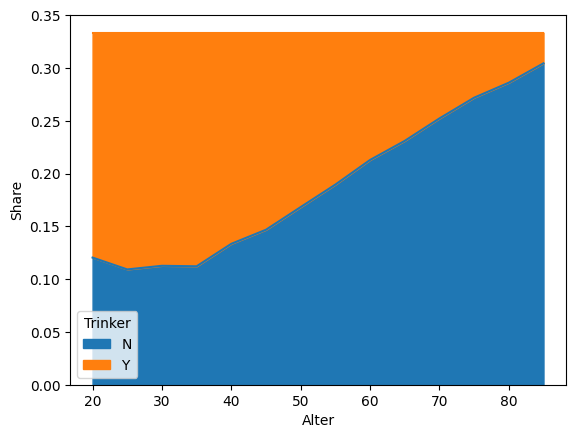

In [68]:
# Analyse aus den vorherigen Schritten: Anteil Trinker je Altersgruppe

grouped_data = output.groupby(['Alter', 'Trinker'])['Share'].mean().unstack()

# Erstellen Sie das Flächendiagramm
grouped_data.plot(kind='area', stacked=True)
plt.xlabel('Alter')
plt.ylabel('Share')
plt.show()


Der Anteil der Trinker nimmt fortlaufend über das Alter ab.